# Tutorial which introduces the whole API

## Start ansys.post module (this launch the server)

In [1]:
from ansys.dpf import post

server started at --address 10.110.2.65 --port 50052


## Get documentation about DPF

In [2]:
# Here generated with a filepath. Default filepath is the working directory.
post.build_docs("d:/temp/dpf_documentation.html")

## Prepare a solution object

### Get the solution object: must be instantiated with the result filepath

In [3]:
solution = post.solution("d:/rst/twobodies.rst")
print(solution)

Static result object.


Data Sources
------------------------------
DPF data_sources with result key: rst 
paths: {'rst': ['d:/rst/twobodies.rst']}


DPF Model
------------------------------
Static analysis
Unit system: Metric (m, kg, N, s, V, A)
Physics Type: Mecanic
Available results:
     -  displacement                  
     -  force                         
     -  stress                        
     -  volume                        
     -  energy_stiffness_matrix       
     -  hourglass_energy              
     -  thermal_dissipation_energy    
     -  kinetic_energy                
     -  co_energy                     
     -  incremental_energy            
     -  strain                        
     -  temperature                   
------------------------------
Meshed Region
	5081 nodes
	1246 elements
	Unit: m 
------------------------------
Time/Frequency Info:
	Number of sets: 1

With complex values
 
 Cumulative      Time (s)       Loadstep     Substep   
     1      

### Get a result object from the solution object (result can be: stress, plastic_strain, plastic_stress, temperature, displacement)

In [4]:
print(post.available_keywords())

element_scoping
grouping
location
mapdl_grouping
named_selection
node_scoping
phase
set
subresult
time
time_scoping



In [5]:
stress = solution.stress(location=post.locations.elemental, named_selection="SELECTION", time_scoping=[1]) 

# The line above is equivalent to the following lines:
# stress = solution.stress()
# stress.location = post.locations.elemental
# stress.named_selection = "SELECTION"
# stress.time_scoping = [1]

print(stress)

Stress. 
Tensor object. 

Object properties are: 
 - location = Elemental
 - named_selection = SELECTION
 - time_scoping = [1]
 - operator_name = S



In [6]:
stress.location

'Elemental'

In [7]:
stress.named_selection

'SELECTION'

In [8]:
stress.time_scoping

[1]

## Compute data (here is stress, but that also can be done with displacement, temperature, elastic_strain, plastic_strain)

### Get a subresult

#### SX: stress subresult (X component of the tensor)

In [9]:
sx = stress.XX(set=1) #time and phase (for complex result) can also be used as keyword arguments

# Please note that the following line allows to pass directly to the sx object without created a stress object
# sx = solution.stress(location=post.locations.elemental, named_selection="SELECTION", time_scoping=[1]).XX(set=1)

In [10]:
sx.num_fields()

1

In [11]:
sx_field = sx[0]

In [12]:
sx_data = sx.data_at_field(0)
sx_data.__len__()

510

In [13]:
sx.max()

In [14]:
sx.max_data()

array([3.38161987e+12])

In [15]:
sx.max_data_at_field(0)

3381619871744.0

In [16]:
print(sx)

Stress result.
X component. 

The result is computed thanks to dpf.core.Operator objects, that are chained together regarding the following list: 
- scoping_provider_by_ns: This operator will compute a scoping from a named selection name. Its output (mesh_scoping) will be connected with the mesh_scoping input of the result operator.
- SX: Result operator. Compute the wanted result



#### S: stress subresult (whole tensor)

In [17]:
s = stress.tensor()

In [18]:
s_field = s[0]
s_data = sx.data_at_field(0)
s_data.__len__()
s.max()
s.max_data()

array([[3.38161987e+12, 1.42170320e+12, 7.58025955e+12, 8.34118124e+11,
        7.92399409e+11, 8.84208337e+11]])

In [19]:
s.max_data_at_field(0)

array([3.38161987e+12, 1.42170320e+12, 7.58025955e+12, 8.34118124e+11,
       7.92399409e+11, 8.84208337e+11])

In [20]:
s.min()
s.min_data()
s.min_data_at_field(0)

array([-3.38161993e+12, -1.42170325e+12, -7.58025945e+12, -8.26469237e+11,
       -8.03234398e+11, -8.84208292e+11])

### Display

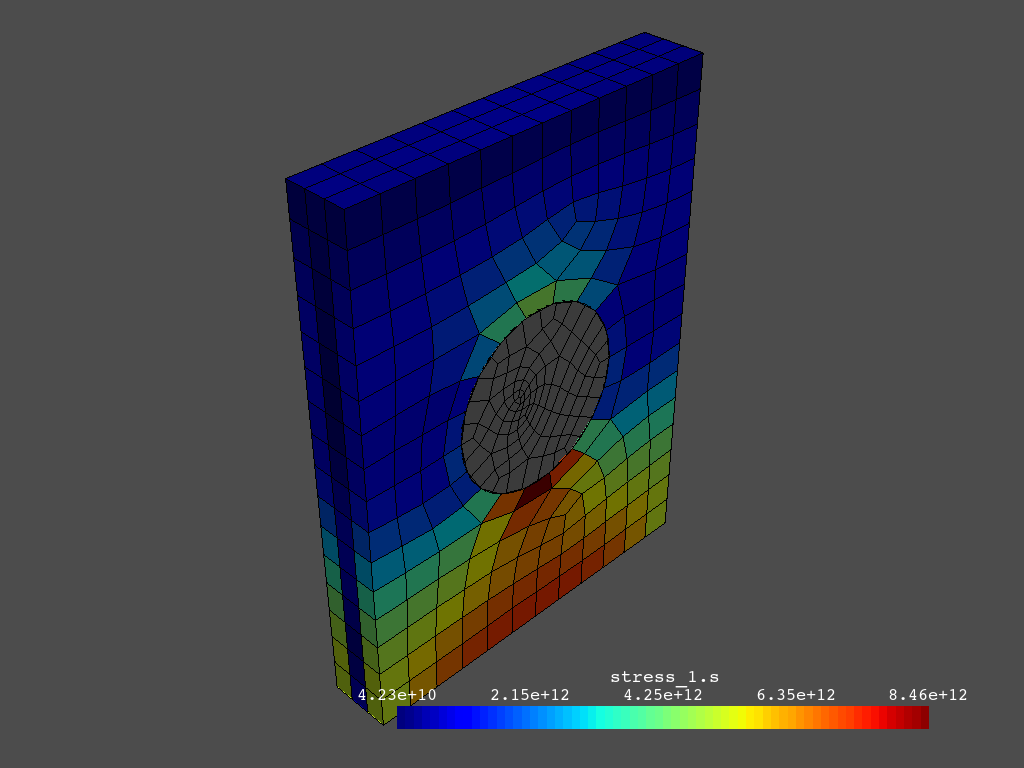

In [21]:
s.plot_contour()